In [101]:
import numpy as np
import matplotlib.pyplot as plt
import unyt
import swiftsimio as sw
import h5py
from scipy.spatial.transform import Rotation as Ro
from pathlib import Path
from PIL import Image
#xray_lum offset>0.2:2.,  13.,  21.,  50.,  64.,  66.,  82., 105
path="/home/jyang/data/Flamingo/L0200N0360/halo_particles/"


f=h5py.File(path+'66.hdf5','r')

Coord_g=np.array(f['PartType1']["Coordinates"])

Coord_dm=f['PartType2']["Coordinates"]
xyz_dm=np.array(Coord_dm).T 
xyz_g=np.array(Coord_g).T

xray_lum=np.array(f['PartType1']['xray_lum_rosat'])
#xray_lum=np.array(f['PartType1']['xray_lum_erosita_low'])+np.array(f['PartType1']['xray_lum_erosita_high'])
T=np.array(f['PartType1']['temperatures'])
f.close()
x_dm=xyz_dm[0]
r=np.max(x_dm)
x_dm=x_dm/r
y_dm=xyz_dm[1]
y_dm=y_dm/r
z_dm=xyz_dm[2]
z_dm=z_dm/r
x_g=xyz_g[0]
x_g=x_g/r
y_g=xyz_g[1]
y_g=y_g/r
z_g=xyz_g[2]
z_g=z_g/r
r_g=np.sqrt(x_g**2+y_g**2+z_g**2)
f=h5py.File(path+'2stars.hdf5','r')
xyz=np.array(f['PartType0']["Coordinates"])
xyz_star=np.array(xyz).T
x_star=xyz_star[0]
x_star=x_star/r
y_star=xyz_star[1]
y_star=y_star/r
z_star=xyz_star[2]
z_star=z_star/r
r_star=np.sqrt(x_star**2+y_star**2+z_star**2)
f.close()
print(r)
xm=x_g[xray_lum==np.max(xray_lum)][0]
ym=y_g[xray_lum==np.max(xray_lum)][0]
zm=z_g[xray_lum==np.max(xray_lum)][0]
axis=np.array([ 1.0164, 0.1624, 0.5402 ])
rotation = Ro.from_rotvec(-axis)

rotated_points = rotation.apply(Coord_g)/r
xlum_m=rotation.apply(np.array([xm,ym,zm]))
folder = "/home/jyang/plot/Flamingo/L0200N0720/halo_2d_lum_rotate/2_kde0/"
img = Image.open(folder+" 1.0164, 0.1624, 0.5402 .png")#.convert("L")
img_array = np.array(img)

pixel_x=len(img_array[0])
pixel_y=len(img_array[:,0])
max_position = np.unravel_index(np.argmax(img_array), img_array.shape)
    
y=(max_position[0]/pixel_y-0.5)*2
x=((1-max_position[1]/pixel_x)-0.5)*2
print(x,y,xlum_m[0],xlum_m[1],xlum_m[2])

3.0487107763053416
0.3340000000000001 -0.6839999999999999 -0.03176053521246543 -0.13230710174081559 -0.10873041500642103


/tmp/ipykernel_245258/3318301490.py:10: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(r_g,np.log10(B),color='r',s=0.1)


Text(0, 0.5, 'log(soft)xray_lum')

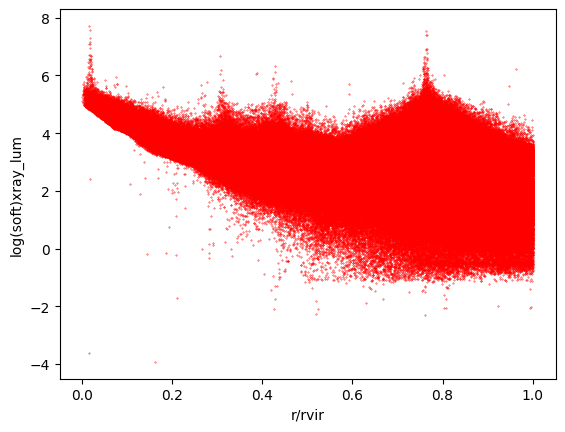

In [3]:
import matplotlib.pyplot as plt
from matplotlib import colors
title="M>1e14"
boxused="/Flamingo/L0200N0720/"
#  x=np.append(x_dm[i],x_g[i])
#  y=np.append(y_dm[i],y_g[i])
fig = plt.figure()
ax=plt.subplot(1,1,1)
B=xray_lum
ax.scatter(r_g,np.log10(B),color='r',s=0.1)
ax.set_xlabel("r/rvir")
ax.set_ylabel("log(soft)xray_lum")

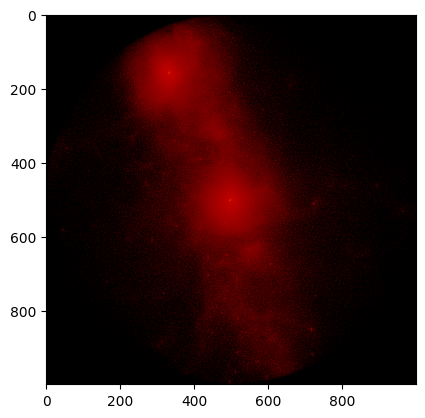

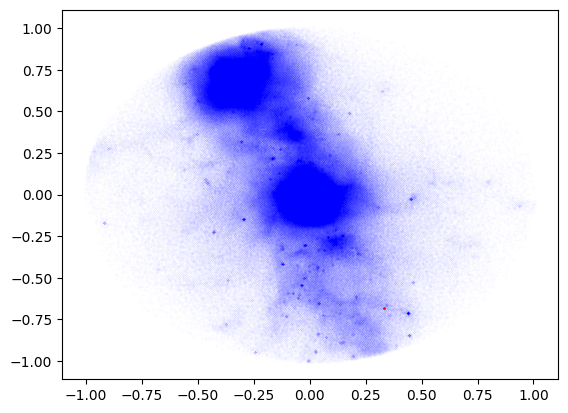

In [100]:

plt.imshow(img)
fig = plt.figure()
ax=plt.subplot(1,1,1)
ax.scatter(rotated_points[:,0],rotated_points[:,1],color='b',s=0.0001)
#print(len(x_g[np.log10(T)<5]))
ax.scatter(x,y,color='r',s=1)

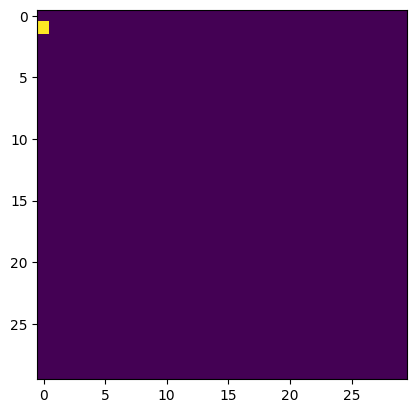

In [9]:
a=np.zeros((30,30))
a[1][0]=1
plt.imshow(a)